# NOTEBOOK PENDIENTE DE COMPLETAR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]


In [3]:
# Cargamos los datos de la equity sistema (no compounded)
data = pd.read_excel('accurate_100k.xlsx',
                     index_col='date', names=['date', 'equity'])

In [4]:
data.tail(5)

,equity
date,
2019-04-24,537.612823
2019-04-25,537.704539
2019-04-26,537.886160
2019-04-29,538.188354
2019-04-30,537.998712


In [5]:
# Calculamos el drawdown
data['drawdown'] = data.equity - data.equity.cummax()

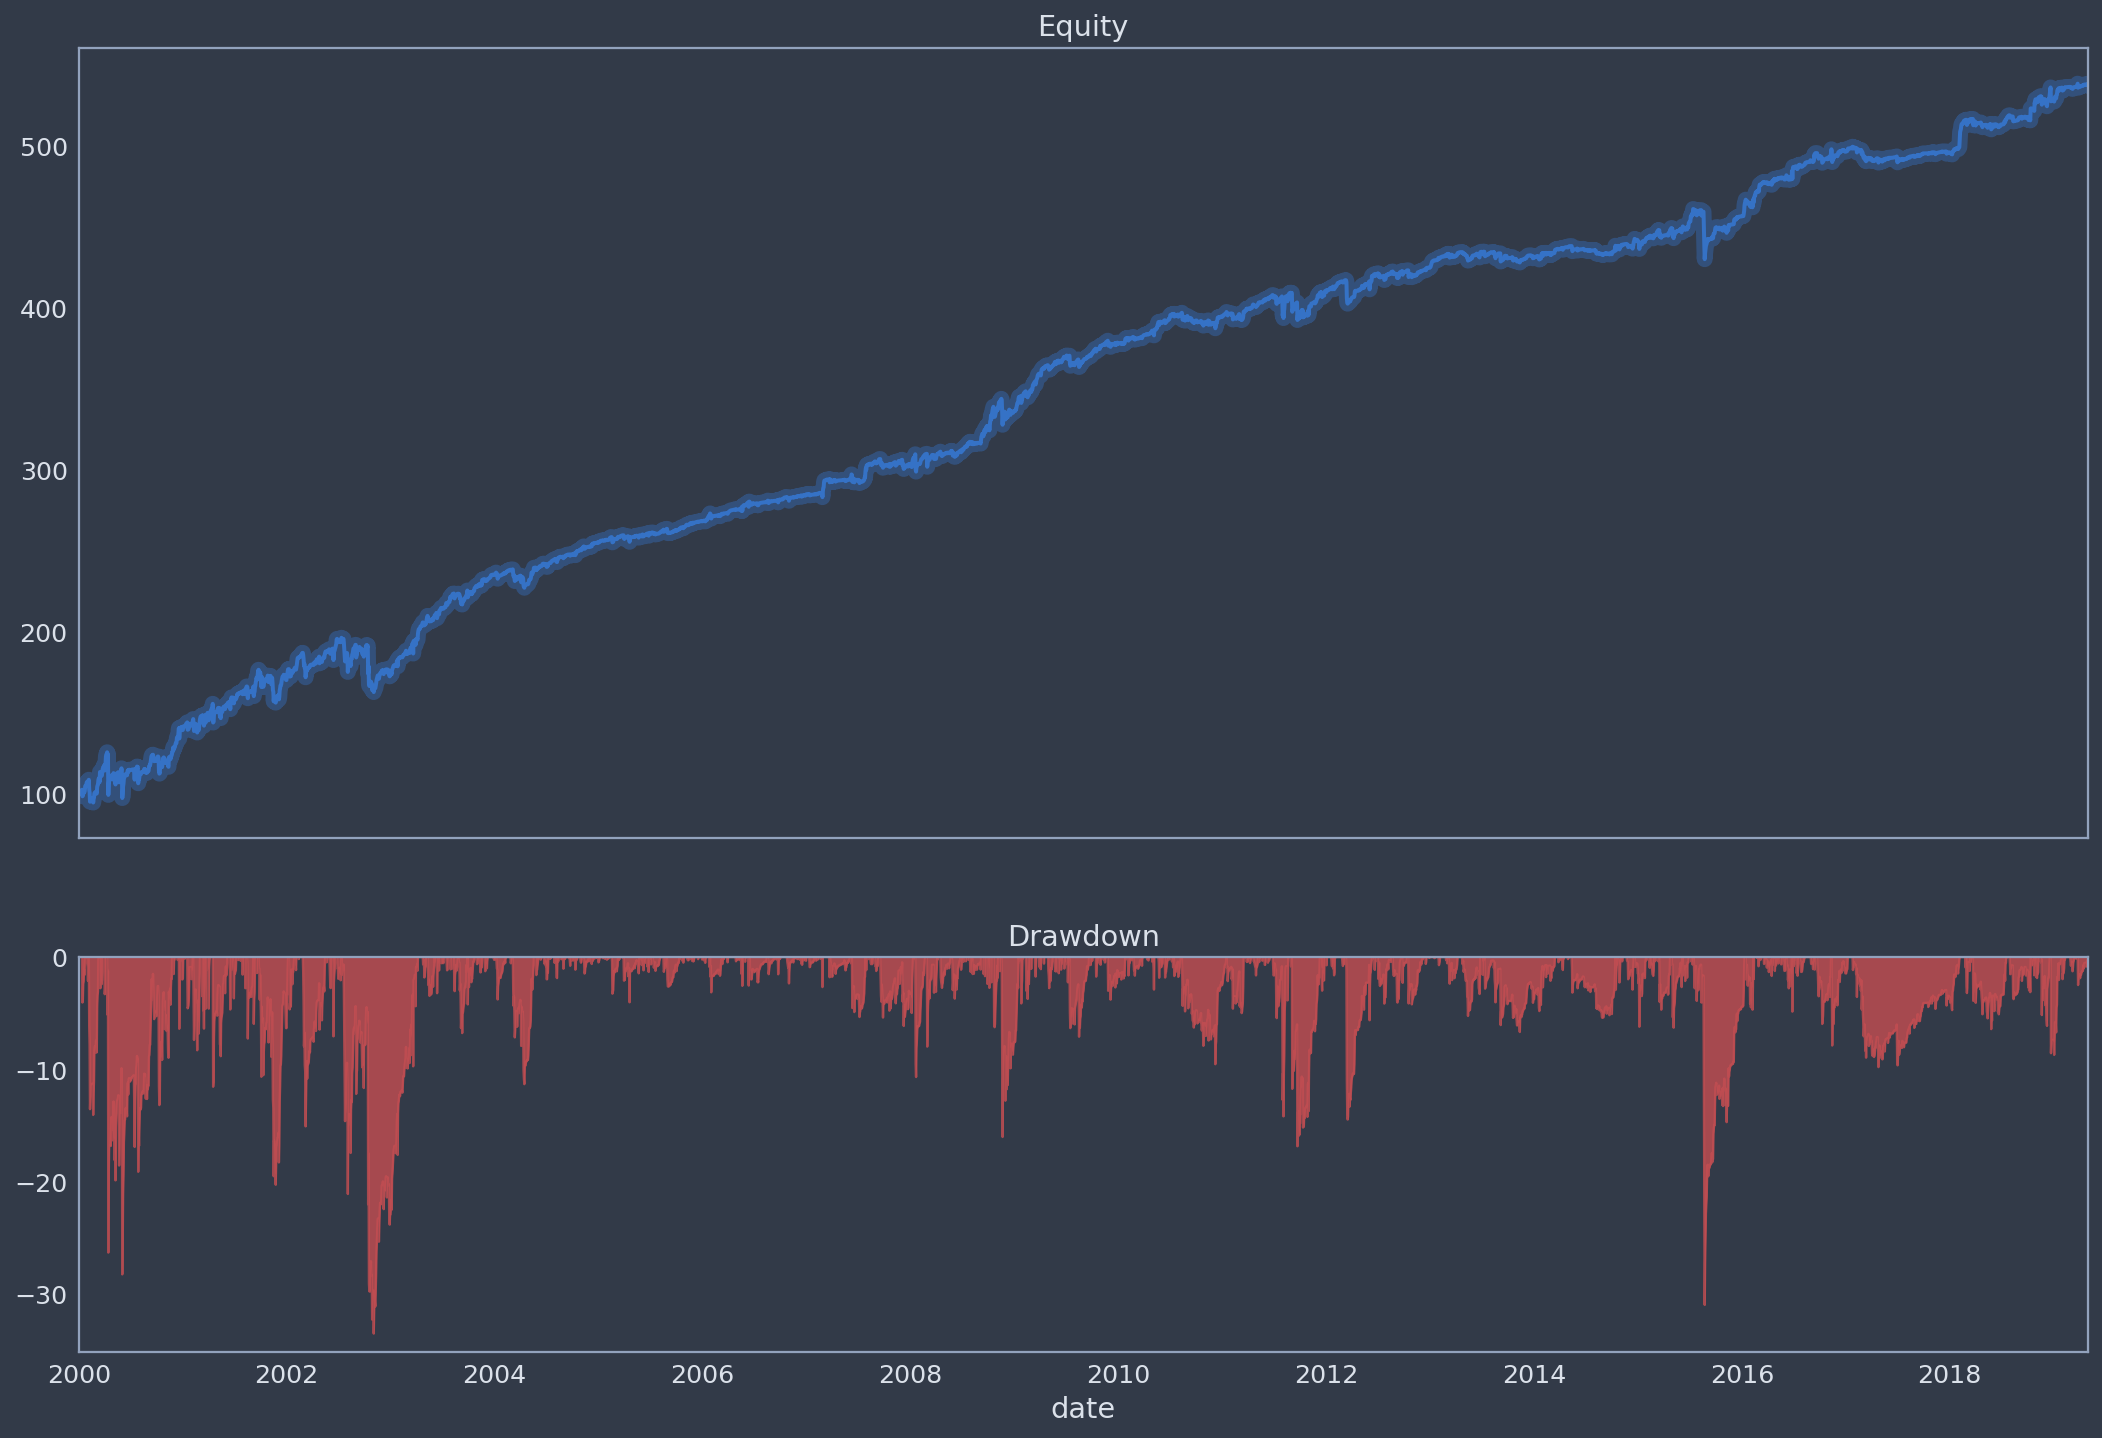

In [6]:
# Graficamos el equity y el drawdown del sistema
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 12),
                               gridspec_kw={'height_ratios': [4, 2]})
data.equity.plot(ax=ax1, title='Equity', linewidth=8, alpha=0.4, c='b')
data.equity.plot(ax=ax1, title='Equity', linewidth=2, c='b')
data.drawdown.plot.area(ax=ax2, color='r', title='Drawdown', alpha=0.8);

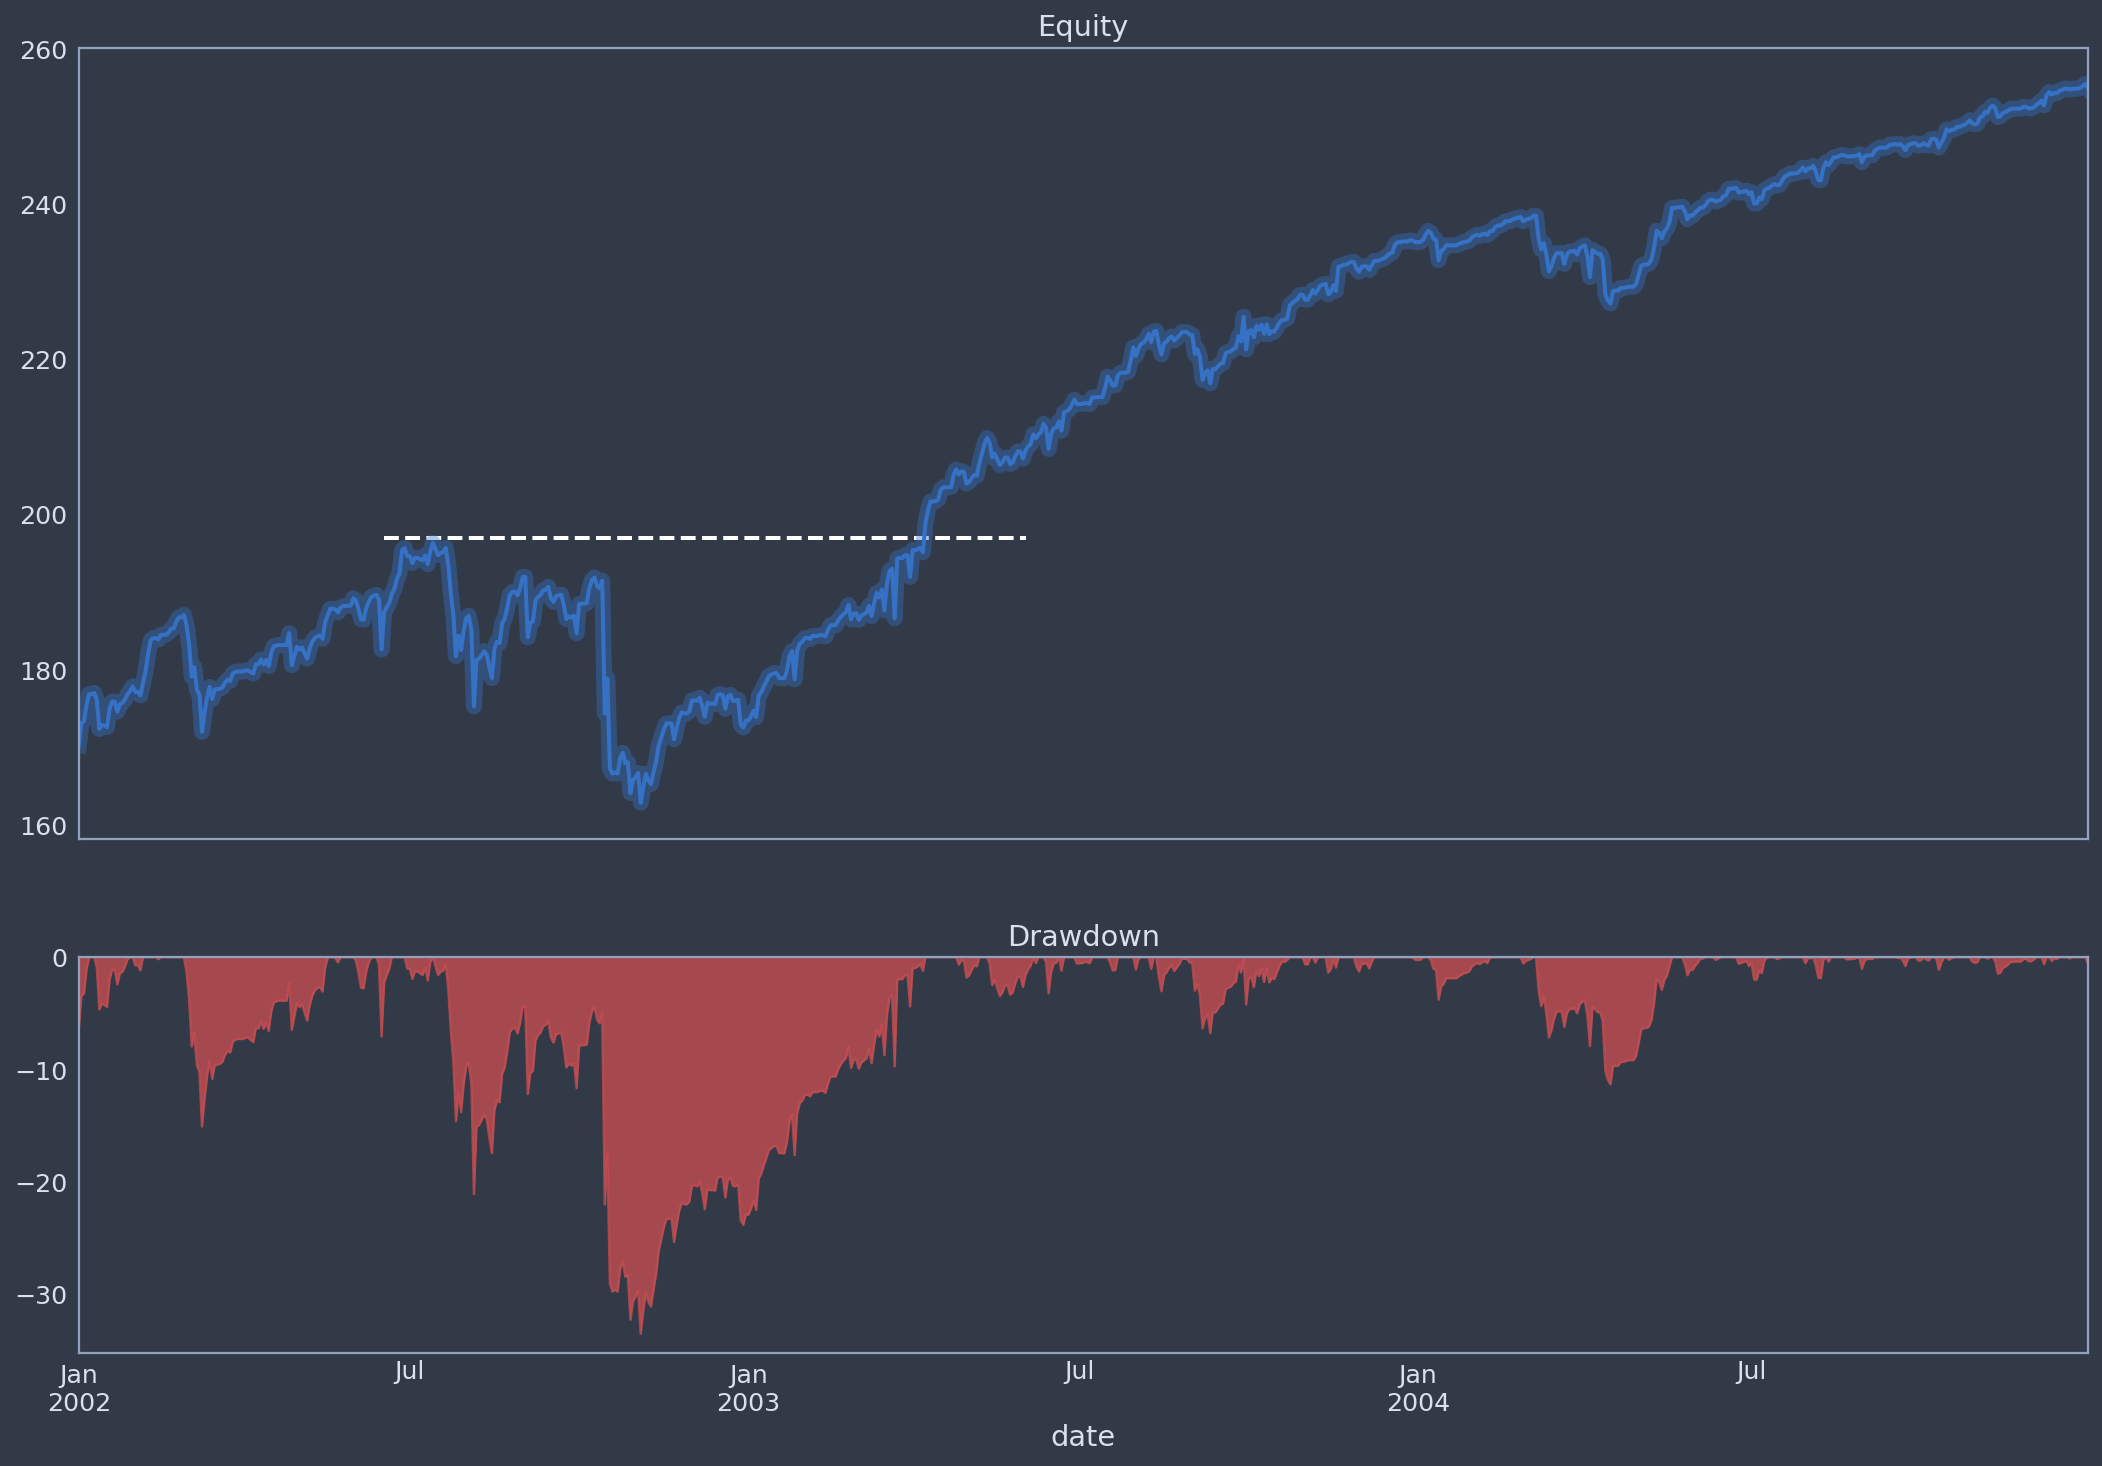

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 12),
                               gridspec_kw={'height_ratios': [4, 2]})
data['2002':'2004'].equity.plot(ax=ax1, title='Equity', linewidth=8, alpha=0.4, c='b')
data['2002':'2004'].equity.plot(ax=ax1, title='Equity', linewidth=2, c='b')
data['2002':'2004'].drawdown.plot.area(ax=ax2, color='r', title='Drawdown', alpha=0.8)
ax1.hlines(197,'2002-06-15','2003-06-01', color='w', linewidth=2, linestyle='--');

In [8]:
recovery_factor = data.equity.iloc[-1] / -data.drawdown.min()
print(f'Recovery factor : {recovery_factor}')

Recovery factor : 16.05544190879325


**En el periodo estudiado RECOVERY FACTOR = {{round(recovery_factor, 2)}}**

In [9]:
# Calculamos los datos de los drawdonws y lo añadimos al dataframe
data['dd_start'] = pd.NaT
data['_date'] = data.index
data.dd_start = data.dd_start.mask(data.drawdown == 0, 0)
data.dd_start = data.dd_start.mask(
    (data.drawdown < 0) & (data.drawdown.shift() == 0), data._date)
data.dd_start = pd.to_datetime(data.dd_start)
data.dd_start.ffill(inplace=True)
data.dd_start = data.dd_start.mask(data.drawdown == 0, np.nan)
data['dd_duration'] = data.groupby('dd_start').dd_start.cumcount() + 1
data.dd_duration = data.dd_duration.mask(data.drawdown == 0, 0)
data.drop('_date', axis=1, inplace=True)
data['dd_total_dur'] = data.groupby(
    'dd_start').dd_duration.transform('max').fillna(0).astype(int)
data['dd_until_end'] = data.dd_total_dur - data.dd_duration + 1

# Veamos algunos aspectos de los drawdown de la equity.

### Visualizamos los 10 mayores drawdown.

In [10]:
dd_groups = data.groupby('dd_start')
drawdowns = data.loc[dd_groups.drawdown.idxmin()]
drawdowns.sort_values('drawdown').head(10)

,equity,drawdown,dd_start,dd_duration,dd_total_dur,dd_until_end
date,,,,,,
2002-11-04,162.834121,-33.508808,2002-07-15,81,191,111
2015-08-24,430.123768,-30.955355,2015-07-15,29,128,100
2000-06-02,97.389463,-28.240387,2000-04-12,38,164,127
2001-11-23,156.306075,-20.264108,2001-09-26,43,73,31
2011-09-22,392.565940,-16.839848,2011-08-31,17,74,58
2008-11-20,327.876896,-16.010545,2008-11-18,3,42,40
2002-03-08,171.967899,-15.068127,2002-02-28,7,56,50
2012-03-16,402.648088,-14.461547,2012-03-09,6,66,61
2011-08-04,393.776737,-14.177582,2011-06-29,27,39,13


### Y los estadísticos de los drawdown en su punto máximo.

In [11]:
(-dd_groups.drawdown.min()).describe().to_frame()

,drawdown
count,284.000000
mean,2.533825
std,4.270055
min,0.002166
25%,0.391109
50%,1.146250
75%,2.775376
max,33.508808


### Los diez de mayor duración

In [12]:
drawdowns.sort_values('dd_total_dur', ascending=False).head(10)

,equity,drawdown,dd_start,dd_duration,dd_total_dur,dd_until_end
date,,,,,,
2017-04-25,489.753218,-9.794060,2017-01-25,65,268,204
2002-11-04,162.834121,-33.508808,2002-07-15,81,191,111
2013-11-12,428.076595,-6.668198,2013-07-09,91,178,88
2000-06-02,97.389463,-28.240387,2000-04-12,38,164,127
2015-08-24,430.123768,-30.955355,2015-07-15,29,128,100
2010-12-08,387.466935,-9.535819,2010-08-13,84,111,28
2014-08-28,432.807925,-5.410274,2014-05-14,77,109,33
2018-05-25,510.286393,-6.412780,2018-03-23,46,84,39
2007-12-10,300.585727,-6.130364,2007-09-18,60,83,24


In [13]:
dd_groups.dd_total_dur.max().describe(
).to_frame().rename(columns={'dd_total_dur': 'Duration'})

,Duration
count,284.000000
mean,13.742958
std,29.245170
min,1.000000
25%,2.000000
50%,4.000000
75%,12.250000
max,268.000000


### Los diez que mas tardaron en recuperar el nivel previo desde el mínimo del drawdown

In [14]:
drawdowns.sort_values('dd_until_end', ascending=False).head(10)

,equity,drawdown,dd_start,dd_duration,dd_total_dur,dd_until_end
date,,,,,,
2017-04-25,489.753218,-9.794060,2017-01-25,65,268,204
2000-06-02,97.389463,-28.240387,2000-04-12,38,164,127
2002-11-04,162.834121,-33.508808,2002-07-15,81,191,111
2015-08-24,430.123768,-30.955355,2015-07-15,29,128,100
2013-11-12,428.076595,-6.668198,2013-07-09,91,178,88
2012-03-16,402.648088,-14.461547,2012-03-09,6,66,61
2011-09-22,392.565940,-16.839848,2011-08-31,17,74,58
2002-03-08,171.967899,-15.068127,2002-02-28,7,56,50
2007-04-03,292.516850,-1.736822,2007-03-27,6,49,44


In [15]:
drawdowns.dd_until_end.describe().to_frame().rename(
    columns={'dd_until_end': 'Recuperation time'})

,Recuperation time
count,284.000000
mean,9.257042
std,19.573206
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,204.000000


### Distribucion de los datos de los drawdown

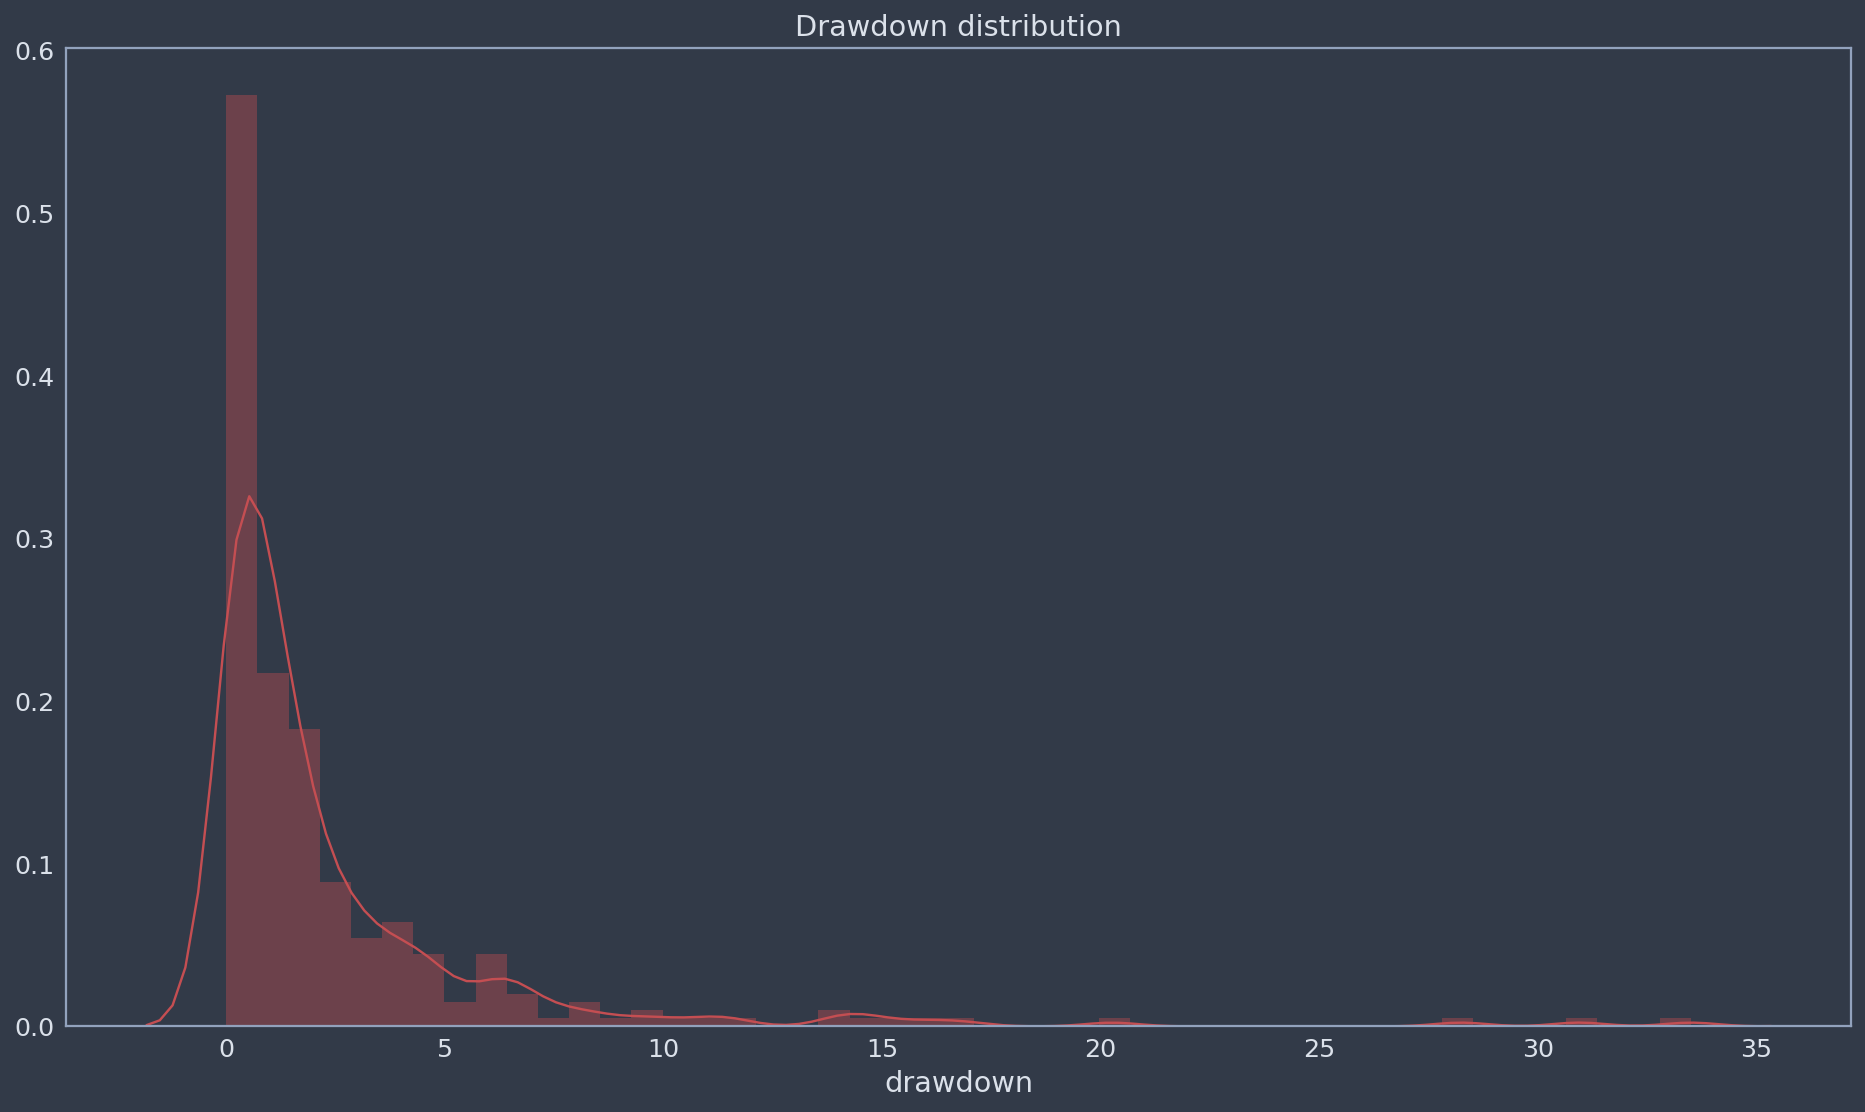

In [16]:
sns.distplot(-data.groupby('dd_start').drawdown.min(), color='r')
plt.title('Drawdown distribution');

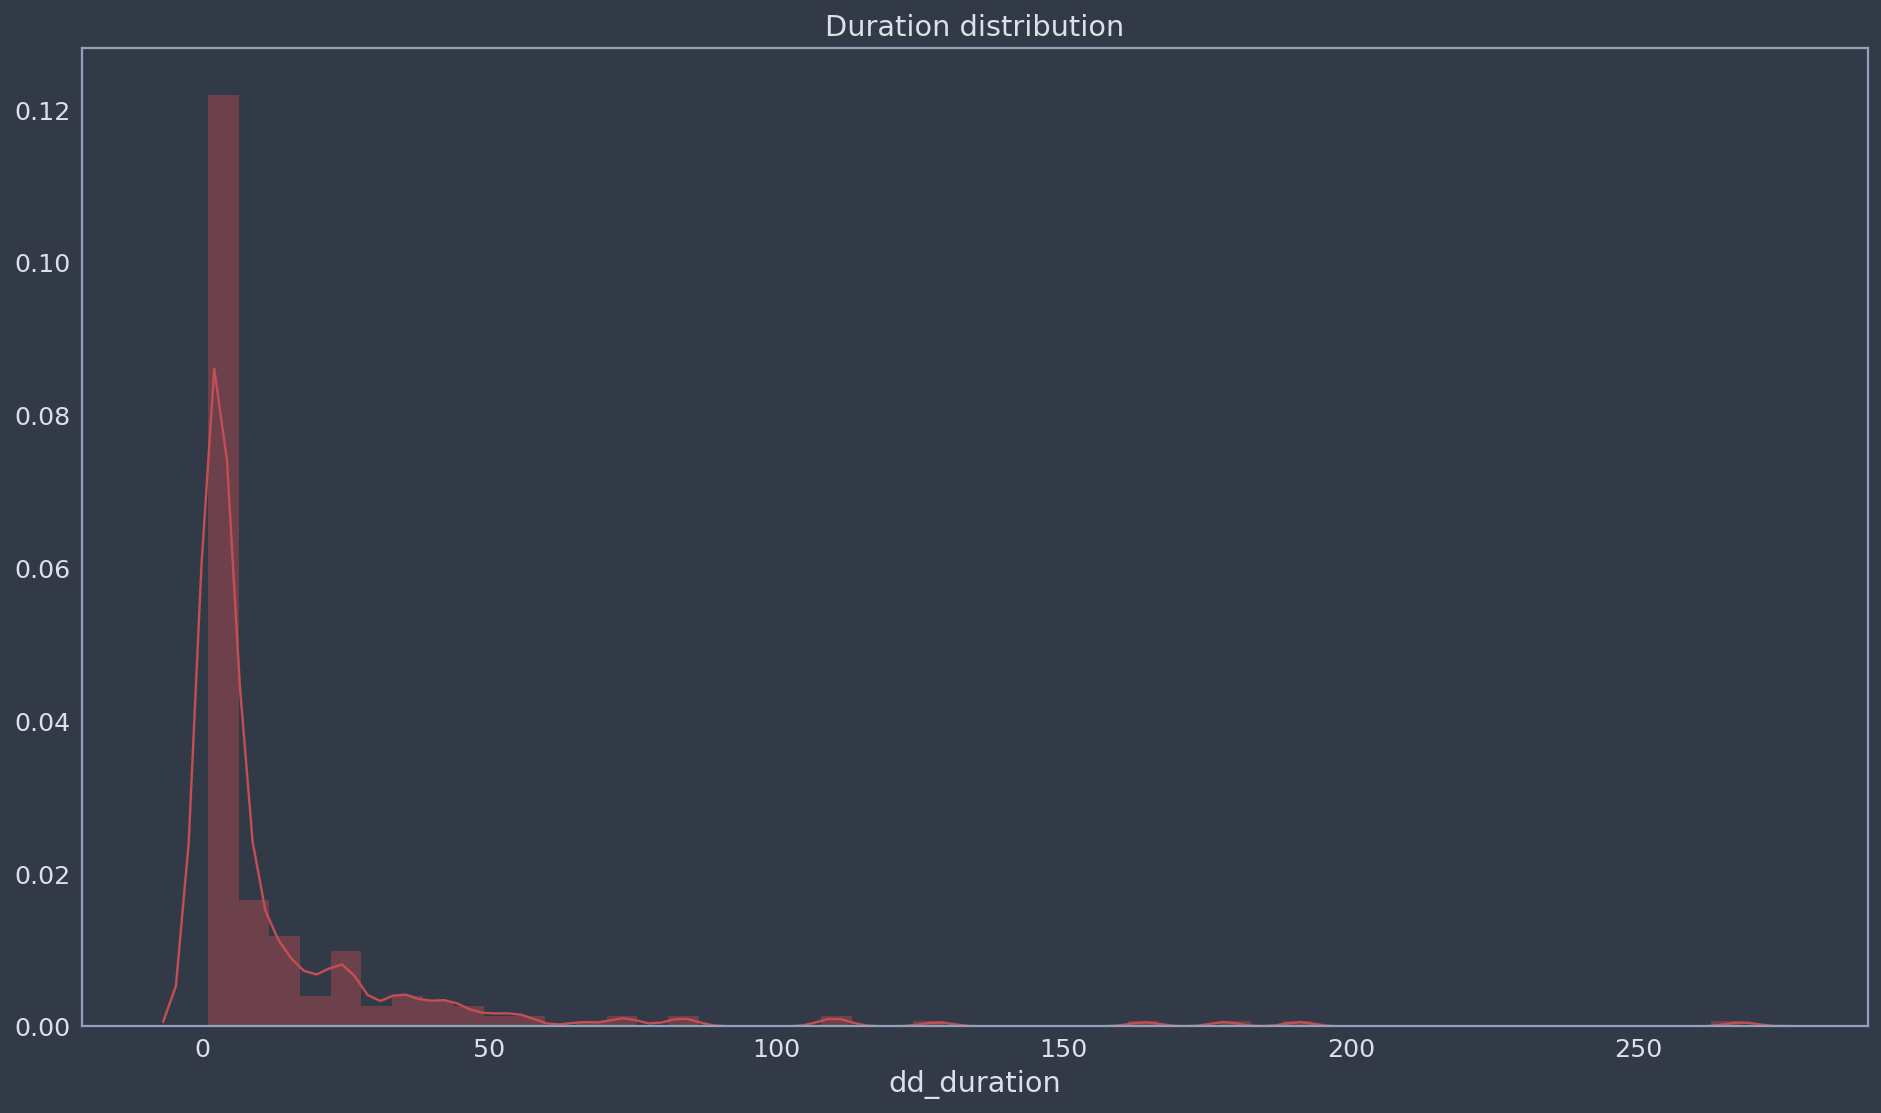

In [17]:
sns.distplot(data.groupby('dd_start').dd_duration.max(), color='r') 
plt.title('Duration distribution');

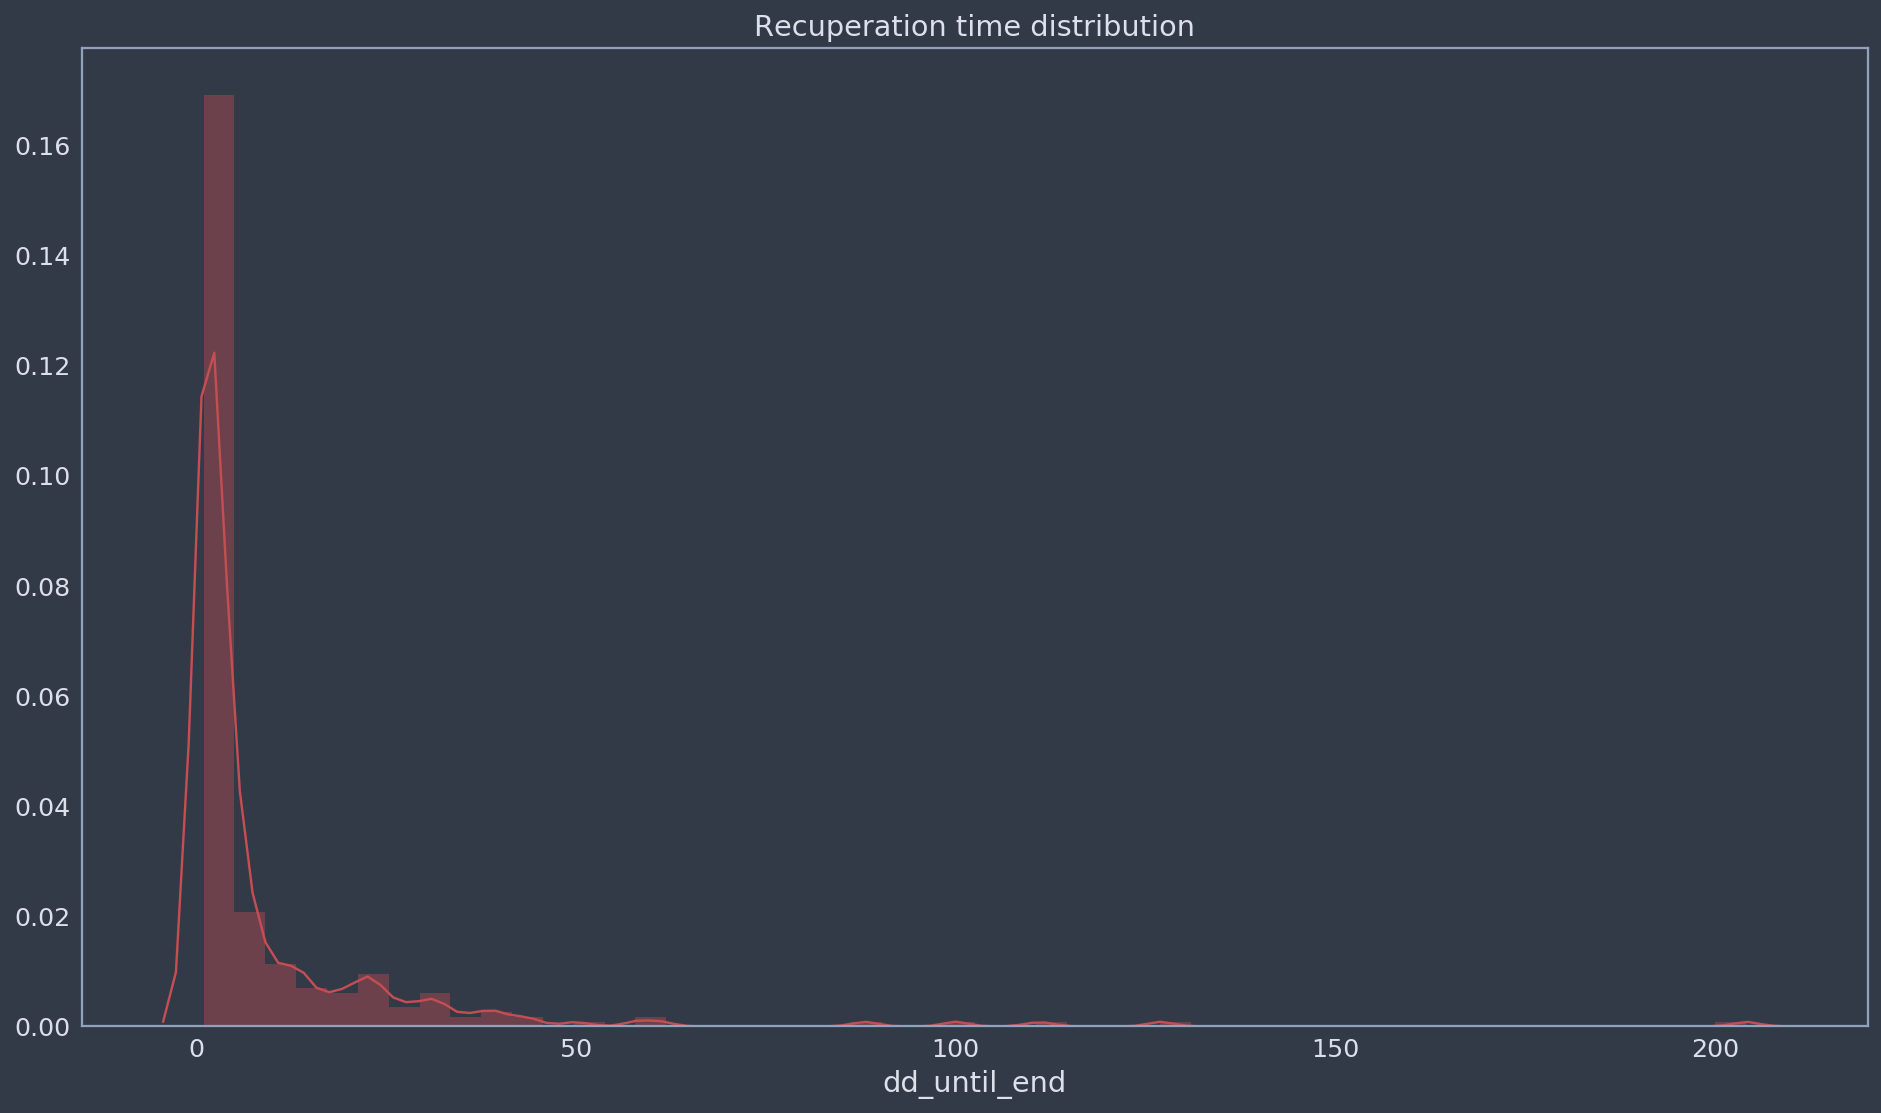

In [18]:
sns.distplot(drawdowns.dd_until_end, color='r')
plt.title('Recuperation time distribution');

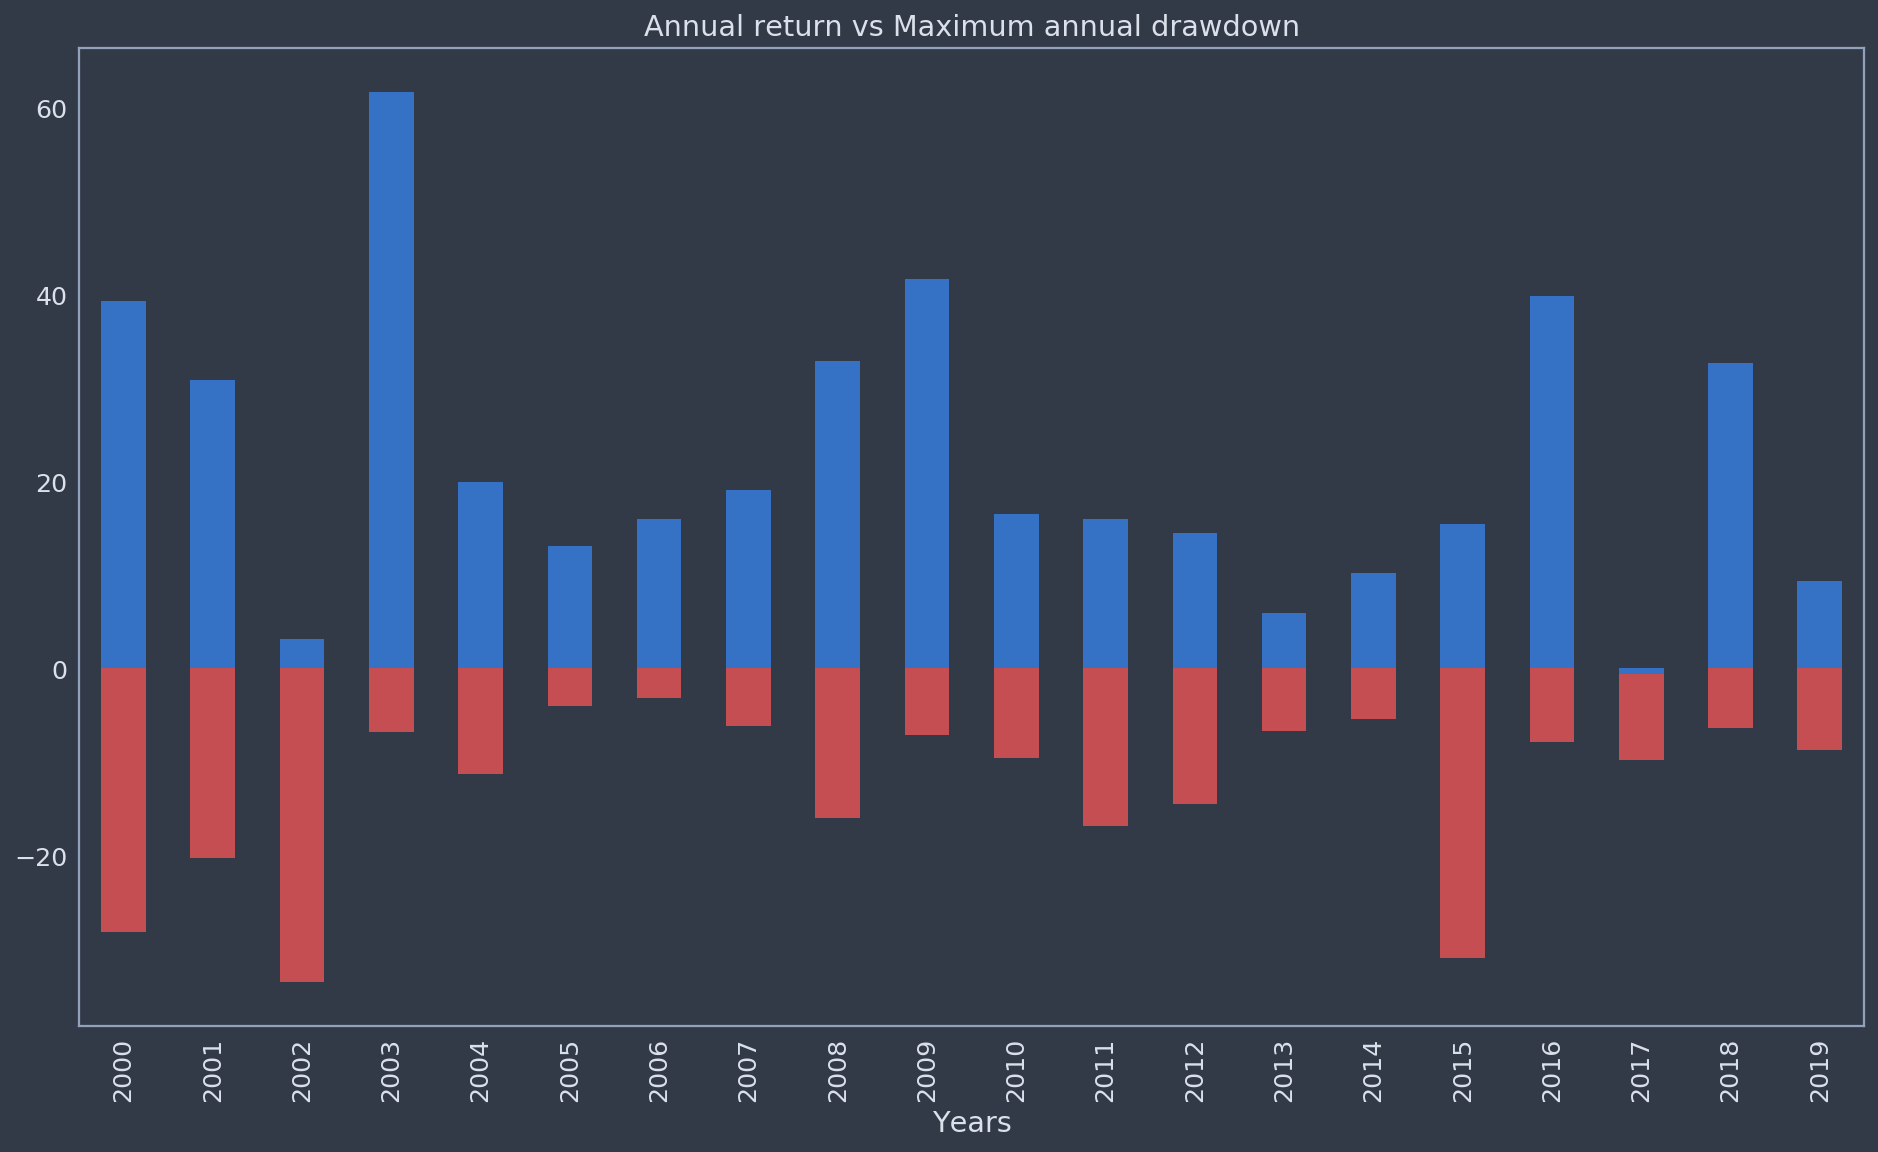

In [19]:
drawdowns.groupby(drawdowns.index.year).drawdown.min().plot.bar(color='r')
data.equity.groupby(data.index.year).aggregate(
    lambda x: x[-1] - x[0]).plot.bar()
plt.title('Annual return vs Maximum annual drawdown')
plt.xlabel('Years');

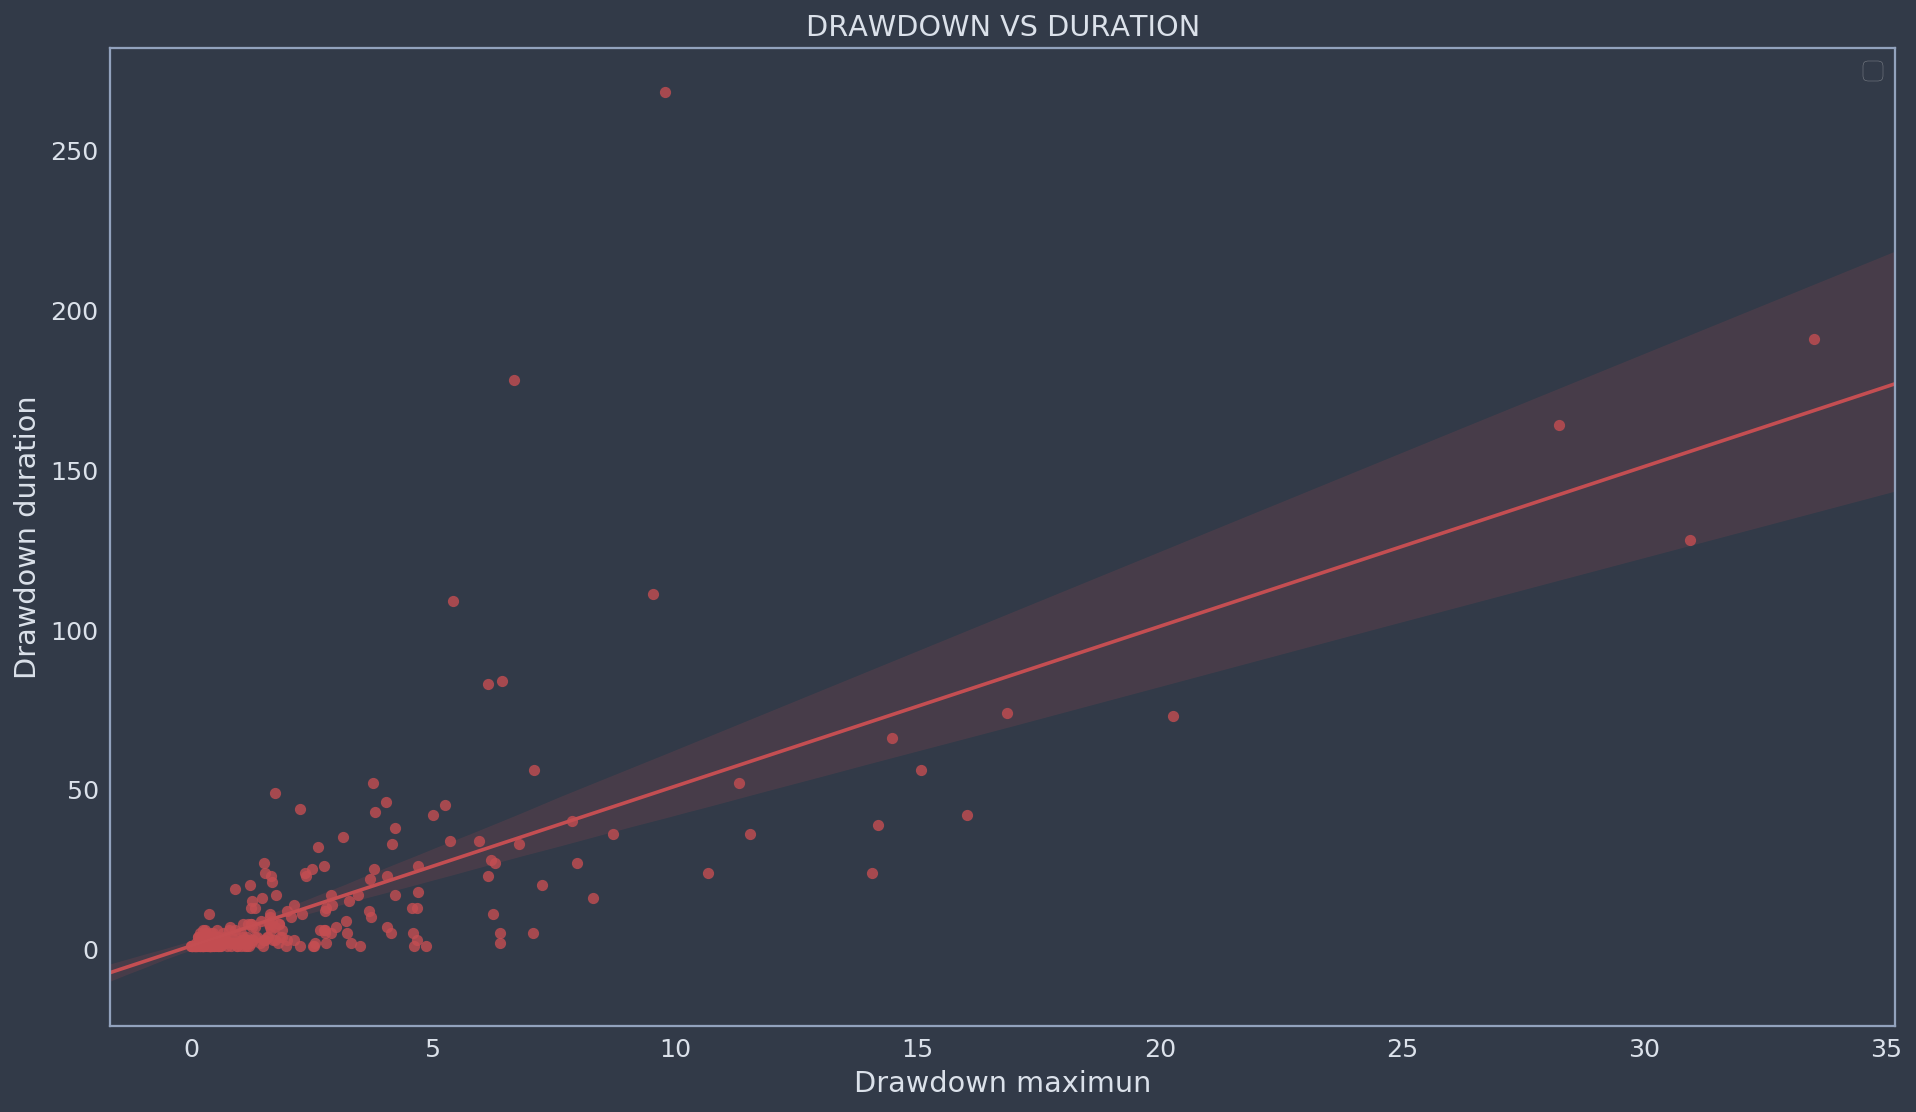

In [21]:
sns.regplot(x=-drawdowns.drawdown, y=drawdowns.dd_total_dur,
                color='r')
plt.legend([])
plt.ylabel('Drawdown duration')
plt.xlabel('Drawdown maximun')
plt.title('Drawdown vs duration'.upper());

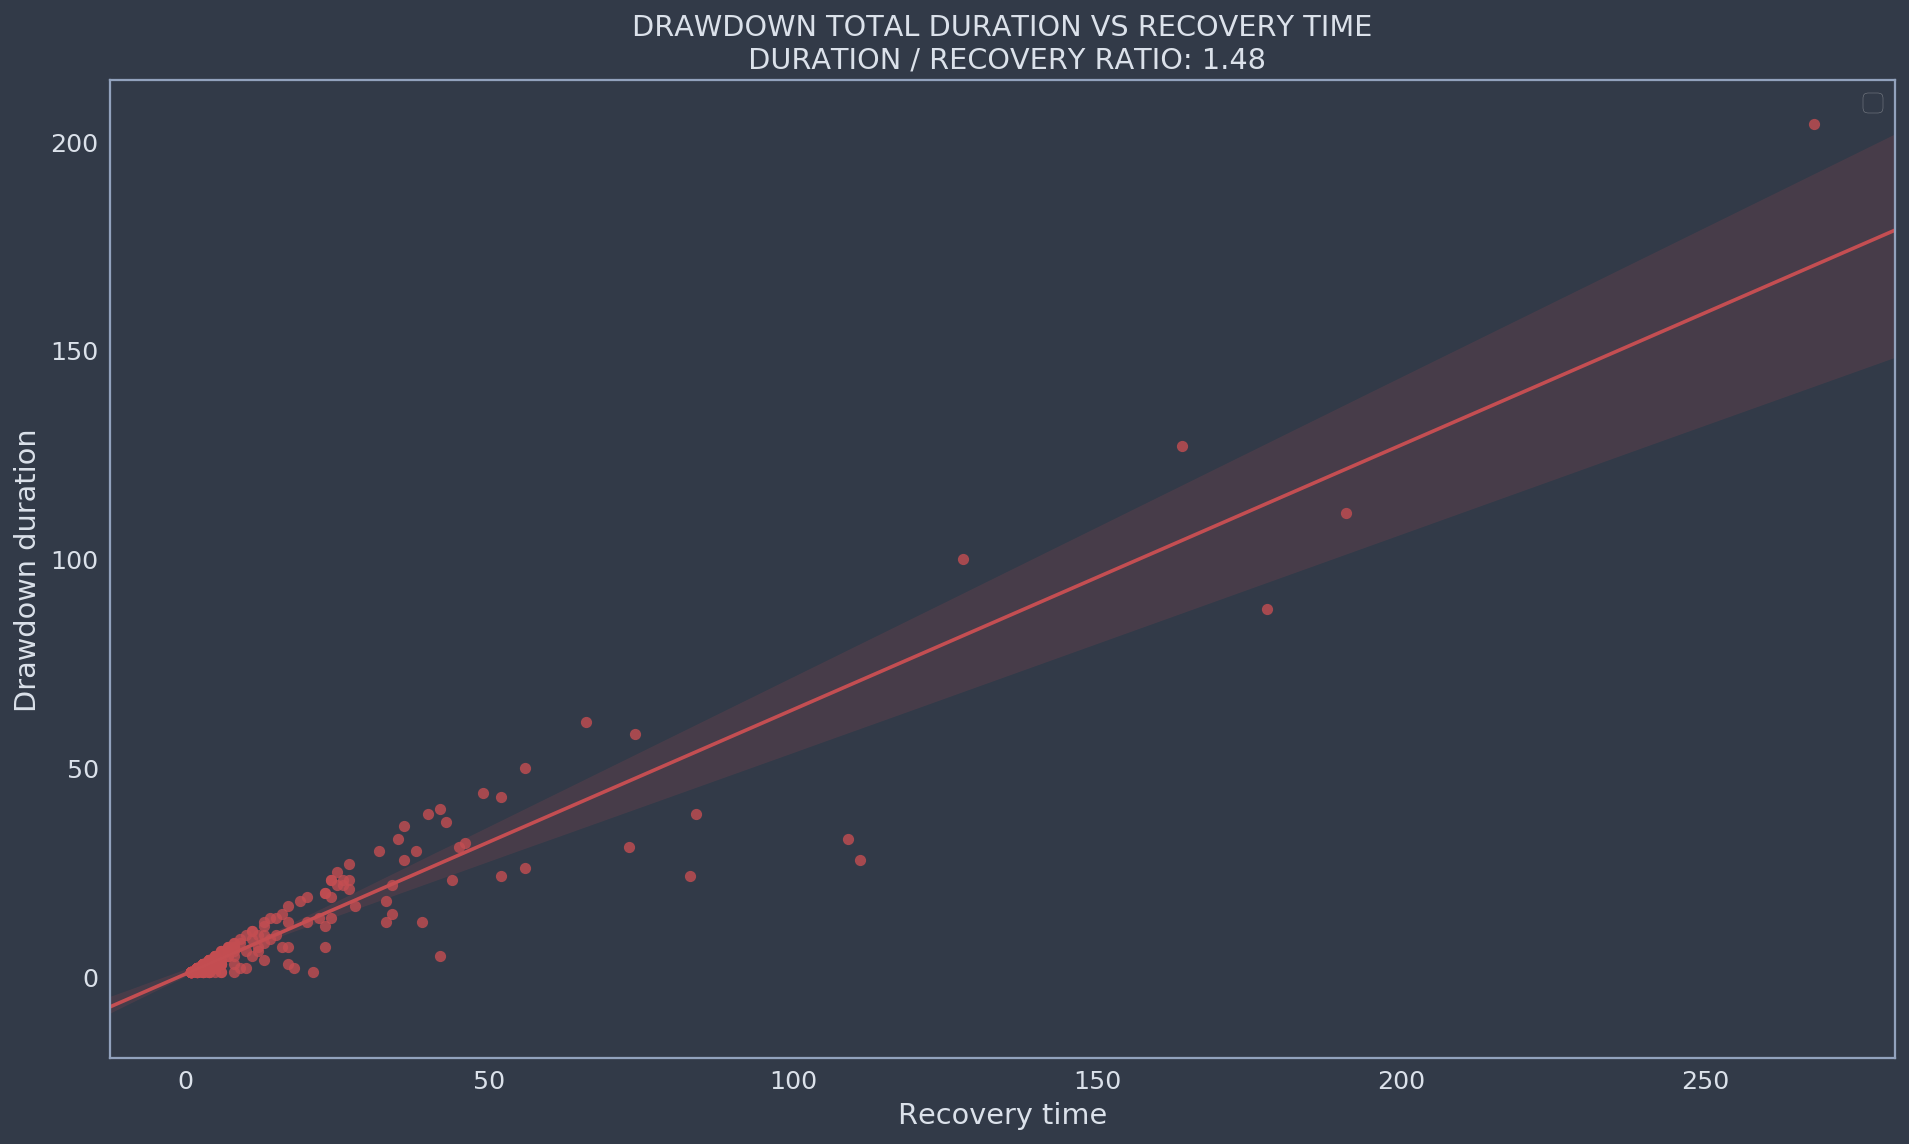

In [25]:
recovery_duration_ratio = round(
    drawdowns.dd_total_dur.mean() / drawdowns.dd_until_end.mean(), 2)
sns.regplot(y=drawdowns.dd_until_end, x=drawdowns.dd_total_dur,
                color='r')
plt.legend([])
plt.ylabel('Drawdown duration')
plt.xlabel('Recovery time')
plt.title(
    f'Drawdown total duration vs recovery time\n duration / recovery ratio: {recovery_duration_ratio}'.upper());